In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import Easy_Risk_Kit as erk

ind = erk.get_ind_returns()
er=erk.annualized_rets(ind["1996":"2000"],12)

cov=ind["1996":"2000"].cov()

In [4]:

import numpy as np
import pandas as pd
from scipy.optimize import minimize


def msr(riskfree_rate, er, cov):
    """
    from risk free rate+er+cov  to weight
    """
    n=er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds=((0.0, 1.0),)*n
    
    
    weights_sum_to_1={
        'type':'eq',
        'fun':lambda weights:np.sum(weights) -1
    
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio given weights
        """
        r=erk.portfolio_return(weights, er)
        vol=erk.portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol
        
        
        
    
    weights=minimize(neg_sharpe_ratio, init_guess,
                     args=(riskfree_rate, er, cov,), method="SLSQP",
                     options={'disp': False},
                     constraints=(weights_sum_to_1),
                     bounds=bounds     
                    )
    return weights.x

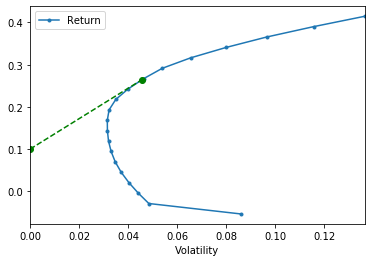

In [28]:
ax=erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf=0.1
w_msr=msr(rf, er, cov)
r_msr=erk.portfolio_return(w_msr, er)
vol_msr=erk.portfolio_vol(w_msr, cov)
#Add Capital Market Line
cml_x=[0, vol_msr]
cml_y=[rf, r_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

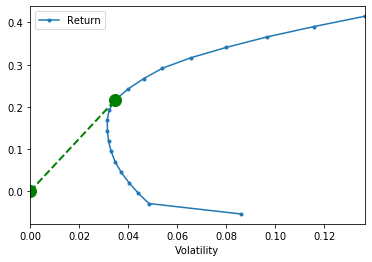

In [35]:
erk.plot_ef(20, er, cov, show_cml=True)

In [5]:
l=["Fin","Smoke","Coal"]
erk.msr(0.1, l, cov)

array([2.69476287e-15, 9.07680289e-17, 0.00000000e+00, 0.00000000e+00,
       1.90810871e-15, 2.45663617e-15, 0.00000000e+00, 4.55961473e-01,
       1.98058030e-15, 0.00000000e+00, 2.12385384e-15, 2.12247988e-15,
       0.00000000e+00, 2.33810857e-01, 1.13048075e-15, 3.84603659e-16,
       4.31345817e-15, 1.38704168e-01, 1.94676018e-15, 8.94091664e-02,
       9.97361505e-17, 5.72464548e-16, 1.55177023e-02, 1.45006817e-16,
       0.00000000e+00, 9.83698306e-16, 6.65966335e-02, 6.51433332e-16,
       9.01722532e-16, 3.71385418e-15])